# Scientific Computing with Python (Second Edition)
# Chapter 16
## 16.1 What are symbolic computations?¶

In [1]:
from scipy.integrate import quad
quad(lambda x : 1/(x**2+x+1),a=0, b=4)   

(0.9896614396122965, 1.1735663442283496e-08)

### 16.1.1 Elaborating an example in SymPy

In [2]:
from sympy import *
init_printing()

In [3]:
x = symbols('x')
f = Lambda(x, 1/(x**2 + x + 1))

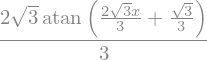

In [4]:
integrate(f(x),x)    


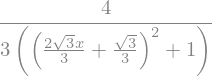

In [5]:
pf = Lambda(x, integrate(f(x),x))
diff(pf(x),x)

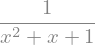

In [6]:
simplify(diff(pf(x),x)) 

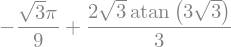

In [7]:
pf(4) - pf(0)     

In [8]:
(pf(4)-pf(0)).evalf()

## 16.2 Basic elements of SymPy
### 16.2.1 Symbols – the basis of all formulas

In [9]:
x, y, mass, torque = symbols('x y mass torque')

In [10]:
symbol_list=[symbols(l) for l in 'x y mass torque'.split()]
symbol_list

In [11]:
x, y, mass, torque = symbol_list

In [12]:
row_index=symbols('i',integer=True)
print(row_index**2)  # returns i**2

i**2


In [13]:
integervariables = symbols('i:l', integer=True)
dimensions = symbols('m:n', integer=True)
realvariables = symbols('x:z', real=True)

In [14]:
A = symbols('A1:3(1:4)')
A

### 16.2.2 Numbers

In [15]:
1/3  # returns 0.3333333333333333
sympify(1)/sympify(3)  # returns '1/3'

In [16]:
Rational(1,3)

### 16.2.3 Functions

In [17]:
f, g = symbols('f g', cls=Function)

In [18]:
f = Function('f')
g = Function('g')

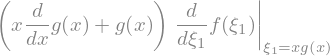

In [19]:
x = symbols('x')
f, g = symbols('f g', cls=Function)
diff(f(x*g(x)),x)

In [20]:
x = symbols('x:3')
f(*x)

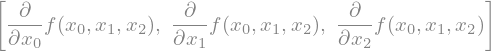

In [21]:
[f(*x).diff(xx) for xx in x]

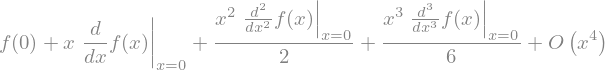

In [22]:
x = symbols('x')
f(x).series(x,0,n=4)

### 16.2.4 Elementary functions


In [23]:
x = symbols('x')
simplify(cos(x)**2 + sin(x)**2)  # returns 1

In [24]:
atan(x).diff(x) - 1./(x**2+1)  # returns 0

In [25]:
import numpy as np
import sympy as sym
# working with numbers
x=3
y=np.sin(x)
y

In [26]:
# working with symbols
x=sym.symbols('x')
y=sym.sin(x)
y

### 16.2.5 Lambda - functions

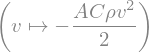

In [27]:
C,rho,A,v=symbols('C rho A v')
# C drag coefficient, A coss-sectional area, rho density
# v speed
f_drag = Lambda(v,-Rational(1,2)*C*rho*A*v**2)
f_drag

In [28]:
x = symbols('x')
f_drag(2)

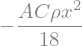

In [29]:
f_drag(x/3)

In [30]:
x,y=symbols('x y')
t=Lambda((x,y),sin(x) + cos(2*y))

In [31]:
t(pi,pi/2)  # returns -1

In [32]:
p=(pi,pi/2)
t(*p)   # returns -1

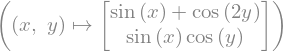

In [33]:
F=Lambda((x,y),Matrix([sin(x) + cos(2*y), sin(x)*cos(y)]))
F

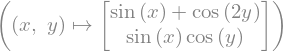

In [34]:
F

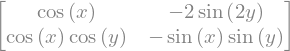

In [35]:
F(x,y).jacobian((x,y))

## 16.3 Symbolic Linear Algebra
### 16.3.1 Symbolic matrices


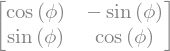

In [36]:
phi=symbols('phi')
rotation=Matrix([[cos(phi), -sin(phi)],
                 [sin(phi), cos(phi)]])
rotation

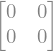

In [37]:
simplify(rotation.T*rotation -eye(2))  # returns a 2 x 2 zero matrix

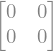

In [38]:
simplify(rotation.T - rotation.inv())

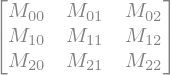

In [39]:
M = Matrix(3,3, symbols('M:3(:3)'))
M

In [40]:
def toeplitz(n):
    a = symbols('a:'+str(2*n))
    f = lambda i,j: a[i-j+n-1]
    return Matrix(n,n,f)

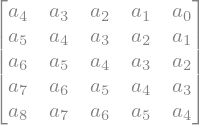

In [41]:
toeplitz(5)

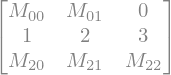

In [42]:
M[0,2]=0  # changes one element
M[1,:]=Matrix(1,3,[1,2,3]) # changes an entire row
M

### 16.3.2 Examples for linear algebra methods in SymPy

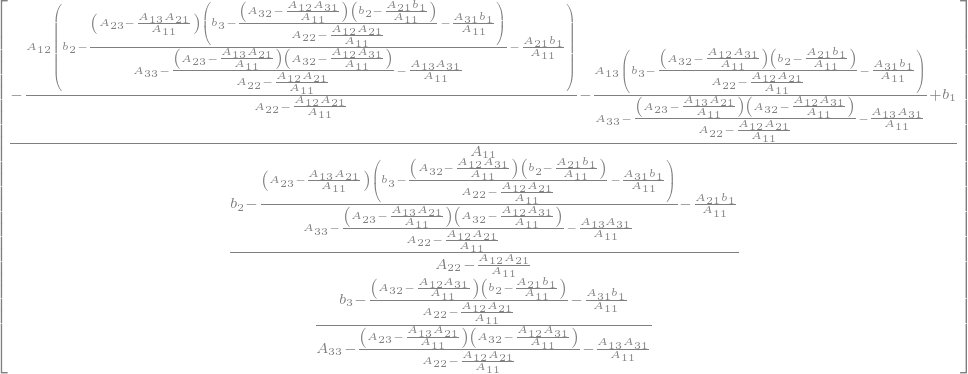

In [43]:
A = Matrix(3,3,symbols('A1:4(1:4)'))
b = Matrix(3,1,symbols('b1:4'))
x = A.LUsolve(b)
x

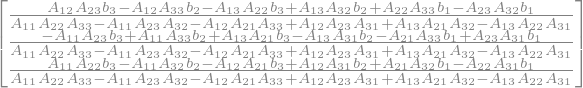

In [44]:
simplify(x)

## 16.4 Substitutions

In [45]:
x, a = symbols('x a')
b = x + a
b

In [46]:
x, a = symbols('x a')
b = x + a
c = b.subs(x,0)   
d = c.subs(a,2*a)  
print(c, d)   # returns (a, 2a)

a 2*a


In [47]:
b.subs(x,0)

In [48]:
b.subs({x:0})  # a dictionary as argument

In [49]:
b.subs({x:0, a:2*a})  # several substitutions in one

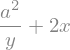

In [50]:
x, a, y = symbols('x a y')
b = x + a
b.subs({a:a*y, x:2*x, y:a/y})
b.subs({y:a/y, a:a*y, x:2*x})

In [51]:
 b.subs([(y,a/y), (a,a*y), (x,2*x)]) 

In [52]:
n, alpha = symbols('n alpha')
b = cos(n*alpha)
b.subs(cos(n*alpha), 2*cos(alpha)*cos((n-1)*alpha)-cos((n-2)*alpha))

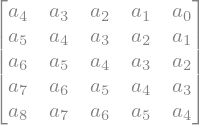

In [53]:
T=toeplitz(5)
T

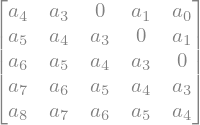

In [54]:
T.subs(T[0,2],0)

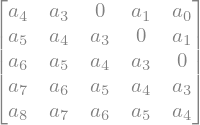

In [55]:
a2 = symbols('a2')
T.subs(a2,0)

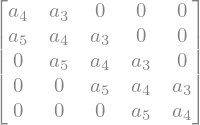

In [56]:
symbs = [symbols('a'+str(i)) for i in range(19) if i < 3 or i > 5]
substitutions=list(zip(symbs,len(symbs)*[0]))
T.subs(substitutions)

## 16. 5 Evaluating symbolic expressions

In [57]:
pi.evalf()   # returns 3.14159265358979

In [58]:
pi.evalf(30)   # returns  3.14159265358979323846264338328

### 16.5.1 Example: A study on the convergence order of Newton's Method

In [59]:
import sympy as sym
x = sym.Rational(1,2)
xns=[x]

for i in range(1,9):
    x = (x - sym.atan(x)*(1+x**2)).evalf(3000)
    xns.append(x)

In [60]:
# Test for cubic convergence
import numpy as np
# Test for cubic convergence
print(np.array(np.abs(np.diff(xns[1:]))/np.abs(np.diff(xns[:-1]))**3,dtype=np.float64))

[0.41041618 0.65747717 0.6666665  0.66666667 0.66666667 0.66666667
 0.66666667]


### 16.5.2 Converting a symbolic expression into a numeric function

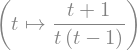

In [61]:
t=symbols('t')
x=[0,t,1]
# The Vandermonde Matrix
V = Matrix([[0, 0, 1], [t**2, t, 1], [1, 1,1]])
y = Matrix([0,1,-1]) # the data vector
a = simplify(V.LUsolve(y)) # the coefficients
# the leading coefficient as a function of the parameter
a2 = Lambda(t,a[0])
a2

In [62]:
leading_coefficient = lambdify(t,a2(t))

Text(0, 0.5, '$a_2(t)$')

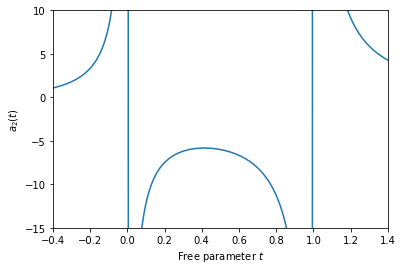

In [63]:
import numpy as np
import matplotlib.pyplot as mp
t_list= np.linspace(-0.4,1.4,200)
ax=mp.subplot(111)
lc_list = [leading_coefficient(t) for t in t_list]
ax.plot(t_list, lc_list)
ax.axis([-.4,1.4,-15,10])
ax.set_xlabel('Free parameter $t$')
ax.set_ylabel('$a_2(t)$')